# Code for Figure 3 parts (a) and (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [6]:
scens1 = ['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

tables_dfs_timeofpeak = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                                                index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                                columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for k, penlevel in enumerate([0.5, 1.0]):
#     if penlevel == 0.5:
    folder = 'Fuel1_Solar35_Wind3'
#     else:
#         folder = 'Fuel1_Solar35_Wind3_Curves'
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
            inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
            tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max())[0][0]
        
    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    demand_df = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
    inds = demand_df[pd.to_datetime(demand_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
    tables_dfs_timeofpeak[penlevel].loc[scen1, scen2] = np.where(demand_df.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0) == demand_df.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max())[0][0]




In [7]:
print('Hour of peak in mean weekday *net* demand at 50%:')
tables_dfs_timeofpeak[0.5]

Hour of peak in mean weekday *net* demand at 50%:


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,20.0,19.0,19.0,19.0,0.0
_Timers9pm_noWPcontrol,21.0,21.0,19.0,19.0,0.0
_Timers12am_noWPcontrol,19.0,19.0,19.0,19.0,0.0
_TimersNone_noWPcontrol,20.0,19.0,19.0,19.0,0.0
_TimersNone_WPcontrol_minpeak,20.0,19.0,19.0,19.0,0.0
_TimersNone_WPcontrol_avgem,20.0,19.0,19.0,19.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,20.0


In [8]:
print('Hour of peak in mean weekday *net* demand at 100%:')
tables_dfs_timeofpeak[1.0]

Hour of peak in mean weekday *net* demand at 100%:


,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,21.0,20.0,19.0,19.0,0.0
_Timers9pm_noWPcontrol,21.0,21.0,21.0,21.0,0.0
_Timers12am_noWPcontrol,0.0,0.0,19.0,19.0,0.0
_TimersNone_noWPcontrol,20.0,20.0,19.0,19.0,0.0
_TimersNone_WPcontrol_minpeak,20.0,20.0,18.0,19.0,0.0
_TimersNone_WPcontrol_avgem,20.0,20.0,19.0,19.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,21.0


In [3]:
scens1 = ['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((7, 5)) # peak mean weekday total demand
tables_dfs = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((7, 5)) # peak mean weekday net demand
tables_dfs2 = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

penlevel = 0.5
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
        inds = dpdf.loc[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
        vals[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        vals2[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs2.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')

vals[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
vals2[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs2.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()




In [4]:
scens1 = ['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals_100p = np.zeros((7, 5)) # peak mean weekday total demand
tables_dfs_100p = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2_100p = np.zeros((7, 5)) # peak mean weekday net demand
tables_dfs2_100p = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

penlevel = 1.0
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
        inds = dpdf.loc[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
        vals_100p[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        vals2_100p[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs_100p.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
        tables_dfs2_100p.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')

vals_100p[i, j] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs_100p.loc[scen1, scen2] = dpdf.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
vals2_100p[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
tables_dfs2_100p.loc[scen1, scen2] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()




In [5]:
noev_scenario = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
refval1 = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
refval2 = noev_scenario.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

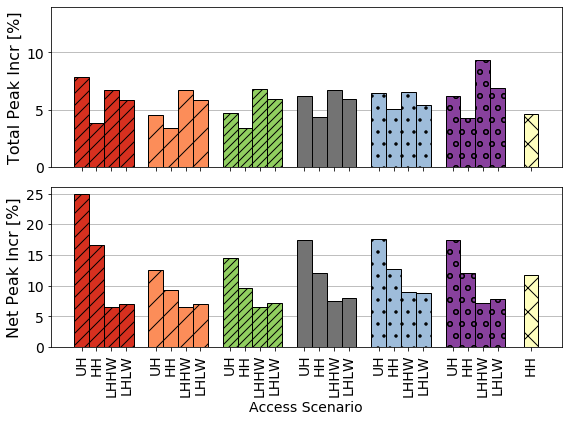

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=False)
colors = [ '#91cf60', '#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['Random Timers', '9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
hatches = ['///', '//', '/', '', '.', 'o']
# vals_plot = (1/1000)*(vals - refval1)
# vals_plot2 = (1/1000)*(vals2 - refval2)
vals_plot = 100*((vals - refval1)/refval1)
vals_plot2 = 100*((vals2 - refval2)/refval2)
# row_order = [3, 4, 5, 1, 2, 0]#{3:axes[0, 0], 4:axes[0, 1], 5:axes[0, 2], 1:axes[1, 0], 2:axes[1, 1], 0:axes[1, 2]}
row_order = [1, 2, 0, 3, 4, 5]
# row_axes = {3:axes[0, 0], 4:axes[0, 1], 5:axes[0, 2], 1:axes[1, 0], 2:axes[1, 1], 0:axes[1, 2]}
all_xtick = np.zeros((0,))
for j, key in enumerate(row_order):
    axes[0].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot[key, np.arange(0, 4)], 0.2, color=colors[key], alpha=1.0, edgecolor='k', hatch=hatches[key])
    axes[1].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot2[key, np.arange(0, 4)], 0.2, alpha=1.0, color=colors[key], edgecolor='k', hatch=hatches[key])
    all_xtick = np.concatenate((all_xtick, np.array([-0.3, -0.1, 0.1, 0.3])+j))
axes[0].bar([j+0.75], vals_plot[6, 4], 0.2, color='#ffffbf', alpha=1.0, edgecolor='k', hatch='x')
axes[1].bar([j+0.75], vals_plot2[6, 4], 0.2, alpha=1.0, color='#ffffbf', edgecolor='k', hatch='x')
all_xtick = np.concatenate((all_xtick, np.array([j+0.75])))

for i in range(2):
    axes[i].set_xticks(all_xtick)
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')
axes[0].set_yticks([0,  5,  10])
axes[0].set_yticklabels([0,  5,  10], fontsize=14)
axes[1].set_yticks([0, 5, 10, 15, 20, 25])
axes[1].set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=14)
axes[0].set_ylim([0, 14])
axes[0].set_ylabel('Total Peak Incr [%]', fontsize=16)
axes[1].set_ylabel('Net Peak Incr [%]', fontsize=16)
legend_elements=[Patch(facecolor='darkslategrey', edgecolor='k', label='Net Demand'), 
                 Patch(facecolor='grey', edgecolor='k', alpha = 0.5, label='Total Demand')]
# axes[0, 3].legend(handles=legend_elements, loc='center', fontsize=11)

tmp = 6*['UH', 'HH', 'LHHW', 'LHLW']
tmp.append('HH')
axes[1].set_xticklabels(tmp, rotation=90, fontsize=14)
axes[1].set_xlabel('Access Scenario', fontsize=14)
# for j in range(4):
#     axes[1, j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW', 'UH', 'HH', 'LHHW', 'LHLW'], rotation=90)

plt.tight_layout()
plt.savefig('fig3_parta_v3_2035.pdf', bbox_inches='tight')
plt.show()

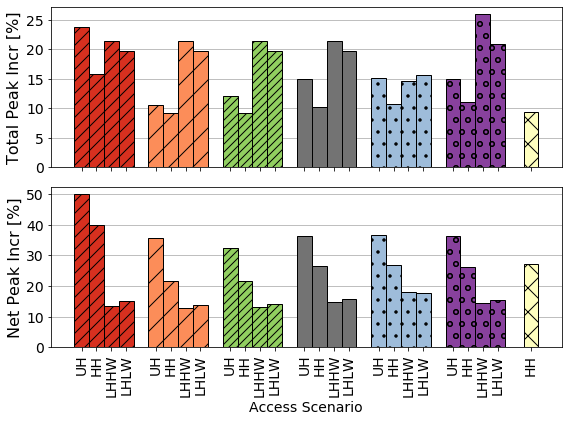

In [14]:
vals_plot = 100*((vals_100p - refval1)/refval1)
vals_plot2 = 100*((vals2_100p - refval2)/refval2)


fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=False)
colors = [ '#91cf60', '#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['Random Timers', '9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
hatches = ['///', '//', '/', '', '.', 'o']
row_order = [1, 2, 0, 3, 4, 5]
all_xtick = np.zeros((0,))
for j, key in enumerate(row_order):
    axes[0].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot[key, np.arange(0, 4)], 0.2, color=colors[key], alpha=1.0, edgecolor='k', hatch=hatches[key])
    axes[1].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot2[key, np.arange(0, 4)], 0.2, alpha=1.0, color=colors[key], edgecolor='k', hatch=hatches[key])
    all_xtick = np.concatenate((all_xtick, np.array([-0.3, -0.1, 0.1, 0.3])+j))
axes[0].bar([j+0.75], vals_plot[6, 4], 0.2, color='#ffffbf', alpha=1.0, edgecolor='k', hatch='x')
axes[1].bar([j+0.75], vals_plot2[6, 4], 0.2, alpha=1.0, color='#ffffbf', edgecolor='k', hatch='x')
all_xtick = np.concatenate((all_xtick, np.array([j+0.75])))

for i in range(2):
    axes[i].set_xticks(all_xtick)
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')
axes[0].set_yticks([0,  5,  10, 15, 20, 25])
axes[0].set_yticklabels([0,  5,  10, 15, 20, 25], fontsize=14)
axes[1].set_yticks([0, 10, 20, 30, 40, 50])
axes[1].set_yticklabels([0, 10, 20, 30, 40, 50], fontsize=14)
# axes[0].set_ylim([0, 14])
axes[0].set_ylabel('Total Peak Incr [%]', fontsize=16)
axes[1].set_ylabel('Net Peak Incr [%]', fontsize=16)
legend_elements=[Patch(facecolor='darkslategrey', edgecolor='k', label='Net Demand'), 
                 Patch(facecolor='grey', edgecolor='k', alpha = 0.5, label='Total Demand')]
# axes[0, 3].legend(handles=legend_elements, loc='center', fontsize=11)

tmp = 6*['UH', 'HH', 'LHHW', 'LHLW']
tmp.append('HH')
axes[1].set_xticklabels(tmp, rotation=90, fontsize=14)
axes[1].set_xlabel('Access Scenario', fontsize=14)
# for j in range(4):
#     axes[1, j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW', 'UH', 'HH', 'LHHW', 'LHLW'], rotation=90)

plt.tight_layout()
plt.savefig('fig3_parta_v3_2035_100p.pdf', bbox_inches='tight')
plt.show()

In [15]:
tmp = (100*(tables_dfs - refval1)/refval1)
tmp = tmp.loc[['_TimersRandom_noWPcontrol', '_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak']]
tmp.to_csv('MainPlotting/Tables/peak_total_demand_pct_50evs.csv')
tmp = (100*(tables_dfs_100p - refval1)/refval1)
tmp = tmp.loc[['_TimersRandom_noWPcontrol', '_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak']]
tmp.to_csv('MainPlotting/Tables/peak_total_demand_pct_100evs.csv')
tmp = (100*(tables_dfs2 - refval2)/refval2)
tmp = tmp.loc[['_TimersRandom_noWPcontrol', '_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak']]
tmp.to_csv('MainPlotting/Tables/peak_net_demand_pct_50evs.csv')
tmp = (100*(tables_dfs2_100p - refval2)/refval2)
tmp = tmp.loc[['_TimersRandom_noWPcontrol', '_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak']]
tmp.to_csv('MainPlotting/Tables/peak_net_demand_pct_100evs.csv')

In [13]:
tmp = (100*(tables_dfs2 - refval2)/refval2)
tmp = tmp.loc[['_TimersRandom_noWPcontrol', '_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak']]

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_TimersRandom_noWPcontrol,14.553096,9.694186,6.611485,7.120727,-100.000000
_Timers12am_noWPcontrol,12.630856,9.368636,6.496398,7.011081,-100.000000
_Timers9pm_noWPcontrol,24.890641,16.561794,6.521179,6.996634,-100.000000
_TimersNone_noWPcontrol,17.448005,12.143379,7.477203,8.014644,-100.000000
_TimersNone_WPcontrol_minpeak,17.577502,12.766932,8.931029,8.887124,-100.000000
_TimersNone_WPcontrol_avgem,17.448619,12.042273,7.201719,7.845757,-100.000000
_TimersMixed_WPcontrol_minpeak,-100.000000,-100.000000,-100.000000,-100.000000,11.710346


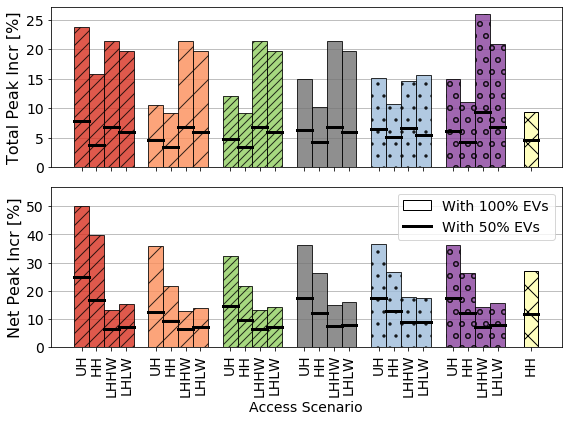

In [49]:
vals_plot = 100*((vals_100p - refval1)/refval1)
vals_plot2 = 100*((vals2_100p - refval2)/refval2)

vals_plot_bars = 100*((vals - refval1)/refval1)
vals_plot2_bars = 100*((vals2 - refval2)/refval2)

alpha=0.8

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=False)
colors = [ '#91cf60', '#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['Random Timers', '9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
hatches = ['///', '//', '/', '', '.', 'o']
row_order = [1, 2, 0, 3, 4, 5]
all_xtick = np.zeros((0,))
for j, key in enumerate(row_order):
    axes[0].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot[key, np.arange(0, 4)], 0.2, color=colors[key], alpha=alpha, edgecolor='k', hatch=hatches[key])
    if j == 3:
        axes[1].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot2[key, np.arange(0, 4)], 0.2, alpha=alpha, color=colors[key], edgecolor='k', hatch=hatches[key], label='With 100% EVs')
    else:
        axes[1].bar(np.array([-0.3, -0.1, 0.1, 0.3])+j, vals_plot2[key, np.arange(0, 4)], 0.2, alpha=alpha, color=colors[key], edgecolor='k', hatch=hatches[key])
    all_xtick = np.concatenate((all_xtick, np.array([-0.3, -0.1, 0.1, 0.3])+j))
axes[0].bar([j+0.75], vals_plot[6, 4], 0.2, color='#ffffbf', alpha=1.0, edgecolor='k', hatch='x')
axes[1].bar([j+0.75], vals_plot2[6, 4], 0.2, alpha=1.0, color='#ffffbf', edgecolor='k', hatch='x')
all_xtick = np.concatenate((all_xtick, np.array([j+0.75])))

for i in range(2):
    axes[i].set_xticks(all_xtick)
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')
axes[0].set_yticks([0,  5,  10, 15, 20, 25])
axes[0].set_yticklabels([0,  5,  10, 15, 20, 25], fontsize=14)
axes[1].set_yticks([0, 10, 20, 30, 40, 50])
axes[1].set_yticklabels([0, 10, 20, 30, 40, 50], fontsize=14)
axes[1].set_ylim([0, 57])
# axes[0].set_ylim([0, 14])
axes[0].set_ylabel('Total Peak Incr [%]', fontsize=16)
axes[1].set_ylabel('Net Peak Incr [%]', fontsize=16)
legend_elements=[Patch(facecolor='white', edgecolor='k', label='With 100% EVs'),
                 Line2D([0], [0], color='k', lw=3,label='With 50% EVs')]
axes[1].legend(handles=legend_elements, fontsize=14, loc='upper right')

tmp = 6*['UH', 'HH', 'LHHW', 'LHLW']
tmp.append('HH')
axes[1].set_xticklabels(tmp, rotation=90, fontsize=14)
axes[1].set_xlabel('Access Scenario', fontsize=14)
# for j in range(4):
#     axes[1, j].set_xticklabels(['UH', 'HH', 'LHHW', 'LHLW', 'UH', 'HH', 'LHHW', 'LHLW'], rotation=90)

shifts = [-0.3, -0.1, 0.1, 0.3]
for j, key in enumerate(row_order):
    for i in range(4):
        axes[0].plot([shifts[i]+j-(0.2/2), shifts[i]+j+(0.2/2)], [vals_plot_bars[key, i], vals_plot_bars[key, i]], color='k', linewidth=3)
        axes[1].plot([shifts[i]+j-(0.2/2), shifts[i]+j+(0.2/2)], [vals_plot2_bars[key, i], vals_plot2_bars[key, i]], color='k', linewidth=3)
axes[0].plot([j+0.75-0.1, j+0.75+0.1], [vals_plot_bars[6, 4], vals_plot_bars[6, 4]], color='k', linewidth=3)
axes[1].plot([j+0.75-0.1, j+0.75+0.1], [vals_plot2_bars[6, 4], vals_plot2_bars[6, 4]], color='k', label='With 50% EVs', linewidth=3)
# axes[1].legend(fontsize=14)


plt.tight_layout()
plt.savefig('fig3_parta_v3_2035_100and50p.pdf', bbox_inches='tight')
plt.show()

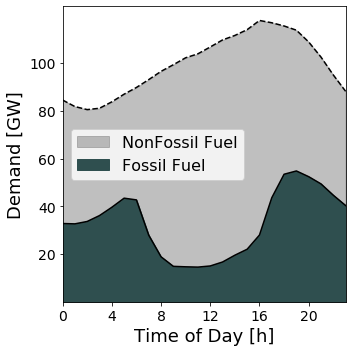

In [6]:
inds = noev_scenario.loc[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0,1,2,3,4])].index
meanday = noev_scenario.loc[inds, 'demand'].values.reshape(-1, 24).mean(axis=0)

plt.figure(figsize=(5, 5))
plt.plot(np.arange(0, 24), (1/1000)*noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24)[185, :], 'k--')
plt.fill_between(np.arange(0, 24), (1/1000)*noev_scenario.loc[inds, 'demand'].values.reshape(-1, 24)[185, :], (1/1000)*noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24)[185, :], alpha=0.5, color='grey', label='NonFossil Fuel')
plt.plot(np.arange(0, 24), (1/1000)*noev_scenario.loc[inds, 'demand'].values.reshape(-1, 24)[185, :], 'k')
plt.fill_between(np.arange(0, 24), 0, (1/1000)*noev_scenario.loc[inds, 'demand'].values.reshape(-1, 24)[185, :], color='darkslategrey', label='Fossil Fuel')
plt.ylim(bottom=0)
plt.xticks([0, 4, 8, 12, 16, 20], fontsize=14)
plt.xlabel('Time of Day [h]', fontsize=18)
plt.xlim([0, 23])
plt.yticks([20, 40, 60, 80, 100], fontsize=14)
plt.ylabel('Demand [GW]', fontsize=18)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('fig3_partb_v2_2035.pdf', bbox_inches='tight')
plt.show()